**Part-2**

In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

iris = datasets.load_iris()

In [4]:
print("Features:",iris.feature_names)
print("Labels:",iris.target_names)
print("Data shape: ",iris.data.shape)

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']
Data shape:  (150, 4)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target , test_size=0.3, random_state=72)

In [71]:
clf = DecisionTreeClassifier(criterion = "gini", random_state = 72)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[0 1 2 2 2 1 1 2 0 0 0 0 1 0 0 1 2 0 0 0 1 2 0 1 1 2 0 2 2 0 1 1 2 2 0 0 0
 1 1 1 0 2 1 1 1]


In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


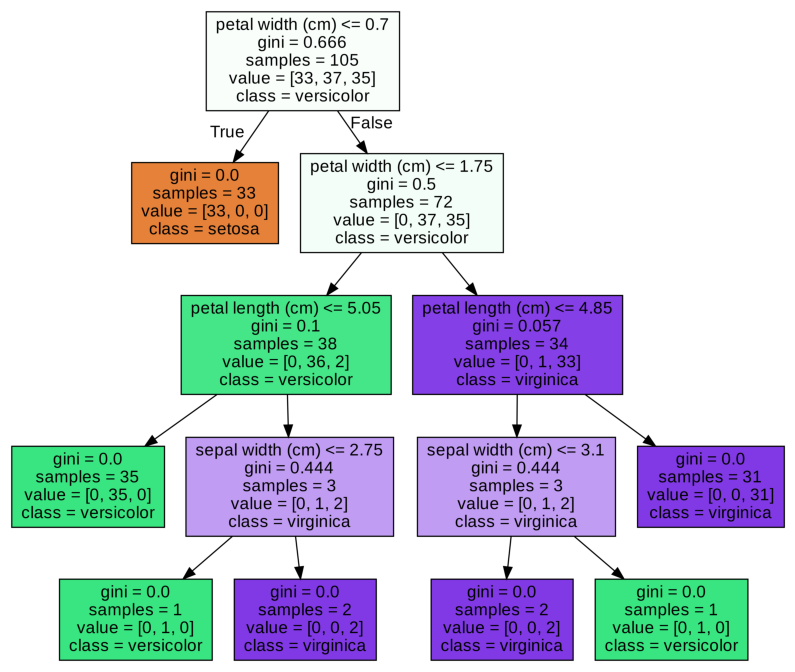

In [72]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='iris_tree.dot',feature_names=list(iris.feature_names),class_names=list(iris.target_names), filled=True)
# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'iris_tree.dot', '-o', 'iris_tree.png', '-Gdpi=600'])

import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('iris_tree.png'))
plt.axis('off')
plt.show()

**Exercise:**

**Task 1: Try the algo on Same Weather dataset- LabelEncoding of fea-
tures: and Train test Division 90%-10%**

In [15]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import sklearn.metrics as metrics

In [16]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [24]:
dataset = pd.read_csv('/content/drive/MyDrive/Data/Dataset1.csv') 
dataset

,Outlook,Temp,Humidity,Wind,Play
0,R,H,Normal,F,N
1,R,H,High,T,N
2,O,H,Normal,F,Y
3,S,M,Normal,F,Y
4,S,C,Normal,F,Y
5,S,C,Low,T,N
6,O,C,Normal,T,Y
7,R,M,Normal,F,N
8,R,C,Low,F,Y
9,S,M,High,F,Y


In [25]:
one_hot_encoded_data = pd.get_dummies(dataset, columns = ['Outlook', 'Temp','Wind','Humidity'])
one_hot_encoded_data

,Play,Outlook_O,Outlook_R,Outlook_S,Temp_C,Temp_H,Temp_M,Wind_F,Wind_T,Humidity_High,Humidity_Low,Humidity_Normal
0,N,0,1,0,0,1,0,1,0,0,0,1
1,N,0,1,0,0,1,0,0,1,1,0,0
2,Y,1,0,0,0,1,0,1,0,0,0,1
3,Y,0,0,1,0,0,1,1,0,0,0,1
4,Y,0,0,1,1,0,0,1,0,0,0,1
5,N,0,0,1,1,0,0,0,1,0,1,0
6,Y,1,0,0,1,0,0,0,1,0,0,1
7,N,0,1,0,0,0,1,1,0,0,0,1
8,Y,0,1,0,1,0,0,1,0,0,1,0
9,Y,0,0,1,0,0,1,1,0,1,0,0


In [26]:
newdata = one_hot_encoded_data.iloc[:,1:12]
newtarget = one_hot_encoded_data.iloc[:,0:1]
print(newdata)
print(newtarget)

    Outlook_O  Outlook_R  ...  Humidity_Low  Humidity_Normal
0           0          1  ...             0                1
1           0          1  ...             0                0
2           1          0  ...             0                1
3           0          0  ...             0                1
4           0          0  ...             0                1
5           0          0  ...             1                0
6           1          0  ...             0                1
7           0          1  ...             0                1
8           0          1  ...             1                0
9           0          0  ...             0                0
10          0          1  ...             0                0
11          1          0  ...             1                0
12          1          0  ...             0                1
13          0          0  ...             0                1

[14 rows x 11 columns]
   Play
0     N
1     N
2     Y
3     Y
4     Y
5     N
6    

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(newdata,newtarget , test_size=0.1, random_state=72)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

    Outlook_O  Outlook_R  ...  Humidity_Low  Humidity_Normal
12          1          0  ...             0                1
0           0          1  ...             0                1
4           0          0  ...             0                1
6           1          0  ...             0                1
13          0          0  ...             0                1
9           0          0  ...             0                0
7           0          1  ...             0                1
11          1          0  ...             1                0
5           0          0  ...             1                0
10          0          1  ...             0                0
3           0          0  ...             0                1
8           0          1  ...             1                0

[12 rows x 11 columns]
   Outlook_O  Outlook_R  ...  Humidity_Low  Humidity_Normal
1          0          1  ...             0                0
2          1          0  ...             0                1

[2

In [28]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 72, max_leaf_nodes=72)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

['Y' 'Y']


In [54]:
from sklearn import metrics
print("Confusion Matrix:",metrics.confusion_matrix(y_test, y_pred))

Confusion Matrix: [[0 1]
 [0 1]]


**Questions: For Task - 1**

**(1) What will be the value of Play, if Outlook is ’Rainy’, Temperature is ’Mild’, Humidity = ’Normal’, and Wind = ’False’?**

In [51]:
pred = [[0,1,0,0,0,1,0,0,1,1,0]]
print(clf.predict(pred))

['Y']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


**(2) What will be the value of Play, if Outlook is ’Sunny’, Temeprature is ’Cool’, Humidity
=’High’, and Wind = ’True’?**

In [52]:
pred = [[0,0,1,1,0,0,0,1,0,0,1]]
print(clf.predict(pred))

['N']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


**(3) Accuracy , precision and recall of both Models?**

In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,pos_label="N"))
print("Recall:",metrics.recall_score(y_test, y_pred,pos_label="N"))

Accuracy: 0.5
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Task 2: Apply algorithm on breast cancer wisconsin dataset - One Hot Encoding of features: and
Train test Division 60%-40%**

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
print("Features:",cancer.feature_names)
print("Labels:",cancer.target_names)

Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels: ['malignant' 'benign']


In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target , test_size=0.40, random_state=72)

In [61]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 72, max_leaf_nodes=72)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)

[1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 1
 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0
 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0]


In [69]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))

Accuracy: 0.9078947368421053
precision: 0.9295774647887324
recall: 0.9230769230769231
